# Efficient Machine Learning System Development

Machine learning offers a wide range of tools—from linear and logistic regression to deep learning and decision trees. However, building a high-performing ML system isn’t just about choosing the right algorithm; it’s about making smart, iterative decisions throughout the project. Effective diagnostics and model evaluation can dramatically reduce development time.

## Iterative Decision-Making & Diagnostics

When a model (say, regularized linear regression for predicting housing prices) yields unsatisfactory predictions, you have several levers to pull:
- **Data:** Is more training data needed?  
- **Features:** Would reducing or expanding your feature set (e.g., adding house characteristics or generating polynomial features) help?  
- **Regularization:** Should you adjust the regularization parameter $\lambda$ (increase or decrease it)?

Running systematic **diagnostics**—tests that reveal which adjustments might lead to improvement—helps avoid spending months on unproductive changes. For example, diagnostics can reveal whether collecting additional data will meaningfully reduce error or if overfitting is the primary issue.

## Evaluating Model Performance

### Train/Test Split

To assess how well your model generalizes to unseen data, start by splitting your dataset:

- **Training Set:** Typically 70–80% of your data, used to fit the model.
- **Test Set:** The remaining 20–30%, reserved exclusively for evaluation.

#### Regression Example

For regularized linear regression, the training cost function is:

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2.
$$

When evaluating on the test set, **exclude the regularization term**:

$$
J_{test}(w,b) = \frac{1}{2m_{test}} \sum_{i=1}^{m_{test}} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.
$$

#### Classification Example

For binary classification (e.g., distinguishing between 0 and 1 in digit recognition):
- You might use logistic regression with its logistic loss function.
- Alternatively, compute the **misclassification error**—the fraction of examples where the predicted label doesn’t match the true label.

### Practical Example

Imagine fitting a fourth-order polynomial to predict housing prices based on size. The model might fit the training data nearly perfectly (low $J_{train}$) but perform poorly on new data (high $J_{test}$) if it overfits. Visualizing such a model is straightforward with one feature, but as dimensions increase, systematic metrics become essential.

## Model Selection with Three-Way Data Splits

Relying solely on a training/test split can be misleading—especially when you need to choose among several models (e.g., polynomials of different degrees or different neural network architectures). Instead, use a three-way split:

- **Training Set:** Fit the model parameters.
- **Cross-Validation (CV) Set:** Also called the validation or dev set, use this to compare models.
- **Test Set:** Evaluate the final chosen model for an unbiased generalization error.

### Step-by-Step Procedure

1. **Split the Data:**  
   For instance, with 10 examples, you might allocate 60% to training, 20% to cross-validation, and 20% to testing.

2. **Train Multiple Models:**  
   Fit models of varying complexity (e.g., polynomial degrees 1 to 10).  
   Denote the parameters for a degree-$d$ model as $(w^d, b^d)$.

3. **Evaluate Using the CV Set:**  
   Compute the CV error for each model:
$$
J_{cv}(w,b) = \frac{1}{2m_{cv}} \sum_{i=1}^{m_{cv}} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.
$$

    Choose the model with the lowest CV error.

5. **Final Evaluation on the Test Set:**  
   Once a model is chosen (say, the degree-4 polynomial with parameters $(w^4, b^4)$), report its performance using:

$$
J_{test}(w^4,b^4) = \frac{1}{2m_{test}} \sum_{i=1}^{m_{test}} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.
$$

   This gives a fair estimate of how the model will perform on new data.

### Extending to Other Models

For neural networks in digit recognition:
- Train different architectures (varying number of layers or hidden units).
- Use the CV set (commonly evaluating misclassification error) to select the best architecture.
- Finally, use the test set to gauge the chosen model’s generalization.

## Best Practices & Looking Ahead

- **Avoid Data Leakage:** Never use the test set during model selection or parameter tuning; reserve it only for the final evaluation.
- **Run Diagnostics Regularly:** Monitoring metrics like bias (error from simplifying assumptions) and variance (sensitivity to training data) helps you balance model complexity.
- **Iterate Efficiently:** Use systematic testing to direct your improvements, rather than random trial and error.

Understanding bias and variance will be key in your next steps. Bias indicates when a model is too simple (underfitting), while variance reflects when a model is too complex (overfitting). Balancing these aspects is critical to developing robust machine learning systems.


In [25]:
import numpy as np

In [26]:
# Load the dataset and inspect the shapes
data = np.loadtxt("data/016_1.csv", delimiter=",")
x, y = data[:,0], data[:,1]

# x = np.expand_dims(x, axis=1)
x = x[:,None]
y = y.reshape(-1, 1)
x.shape, y.shape

((50, 1), (50, 1))

In [27]:
import matplotlib.pyplot as plt

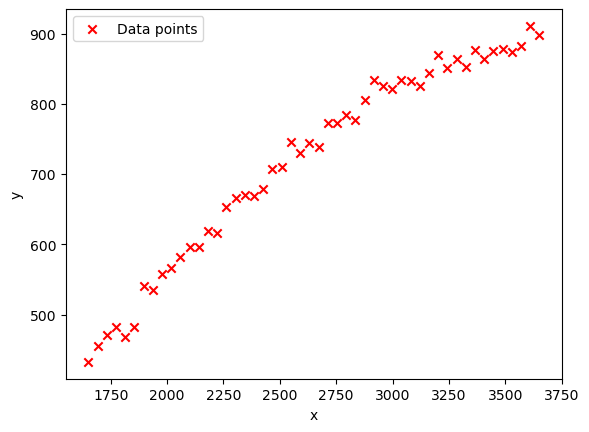

In [28]:
# Vis the data by plotting it
plt.scatter(x, y, marker="x", color="red", label="Data points")
plt.ylabel("y")
plt.xlabel("x")
plt.legend();

In [29]:
from sklearn.model_selection import train_test_split

# Create 3 sets from the data (training, test, cross validation)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
x_test, x_cv, y_test, y_cv = train_test_split(x_test, y_test)

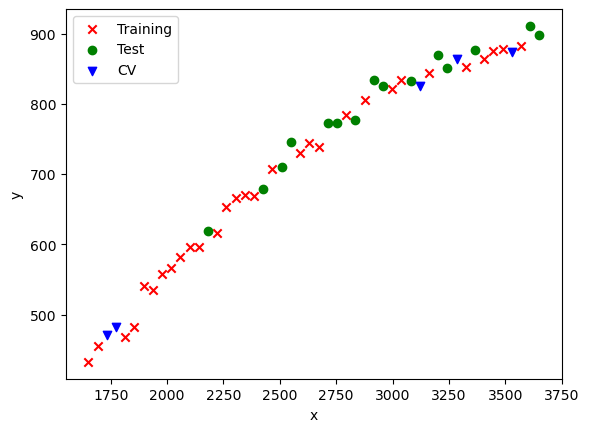

In [30]:
# Plot each
plt.scatter(x_train, y_train, marker="x", color="red", label="Training")
plt.scatter(x_test, y_test, marker="o", color="green", label="Test")
plt.scatter(x_cv, y_cv, marker="v", color="blue", label="CV")
plt.ylabel("y")
plt.xlabel("x")
plt.legend();

In [31]:
from sklearn.preprocessing import StandardScaler

# Perform feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Check out some metrics about the data
scaler.mean_, scaler.scale_.squeeze()

(array([2504.06122449]), array(574.85368063))

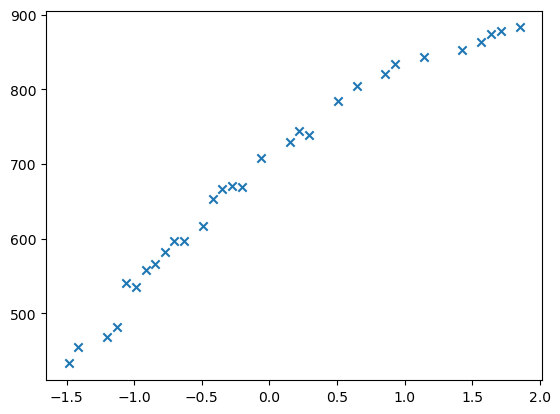

In [32]:
# Plot it again
plt.scatter(x_train_scaled, y_train, marker="x");

In [33]:
from sklearn.linear_model import LinearRegression

# Train a model 
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [34]:
from sklearn.metrics import mean_squared_error
# Evaluate model
yhat = model.predict(x_train_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

Training MSE: 406.19374192533127


In [35]:
# Get the MSE of cross validation
x_cv_scaled = scaler.transform(x_cv)
yhat = model.predict(x_cv_scaled)

print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 395.4588267376531


In [36]:
from sklearn.preprocessing import PolynomialFeatures
# Let's add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
x_train_mapped = poly.fit_transform(x_train)

print(x_train_mapped[:5])

[[3.32446939e+03 1.10520967e+07]
 [2.34487755e+03 5.49845073e+06]
 [3.48773469e+03 1.21642933e+07]
 [2.63059184e+03 6.92001341e+06]
 [2.58977551e+03 6.70693719e+06]]


In [37]:
# Scale the training data
scaler = StandardScaler()
x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
x_train_mapped_scaled[:5]

array([[ 1.42715997,  1.47236856],
       [-0.27691164, -0.36461881],
       [ 1.71117191,  1.84025141],
       [ 0.22010925,  0.1055935 ],
       [ 0.14910627,  0.03511397]])

In [38]:
# Train the model
model = LinearRegression()
model.fit(x_train_mapped_scaled, y_train)

LinearRegression()

In [39]:
# Evaluate the model
yhat = model.predict(x_train_mapped_scaled)
print("Training MSE={}".format(mean_squared_error(y_train, yhat)))

x_cv_mapped = poly.transform(x_cv)
x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
yhat = model.predict(x_cv_mapped_scaled)
print("Cross Validation MSE={}".format(mean_squared_error(y_cv, yhat)))

Training MSE=98.22321866805024
Cross Validation MSE=83.9909131679782


In [40]:
# Now let's try training many models with different polynomial degrees and see which one is doing better

 # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
results = []
for degree in range(1,11):
    item = {}
    
    # Add poly features:
    poly = PolynomialFeatures(degree, include_bias=False)
    x_train_mapped = poly.fit_transform(x_train)
    item["poly"] = poly

    # Scale the input
    scaler = StandardScaler()
    x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
    item["scaler"] = scaler

    # Create and train model
    model = LinearRegression()
    model.fit(x_train_mapped_scaled, y_train)
    item["model"] = model

    # Compute training MSE
    yhat = model.predict(x_train_mapped_scaled)
    item["train_mse"] = mean_squared_error(y_train, yhat) / 2

    # Compute the cross validation MSE
    x_cv_mapped = poly.transform(x_cv)
    x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
    yhat = model.predict(x_cv_mapped_scaled)
    item["cv_mse"] = mean_squared_error(y_cv, yhat) / 2
    results.append(item)



In [41]:
cv_mses = [i["cv_mse"] for i in results]
train_mses = list(map(lambda i: i["train_mse"], results))

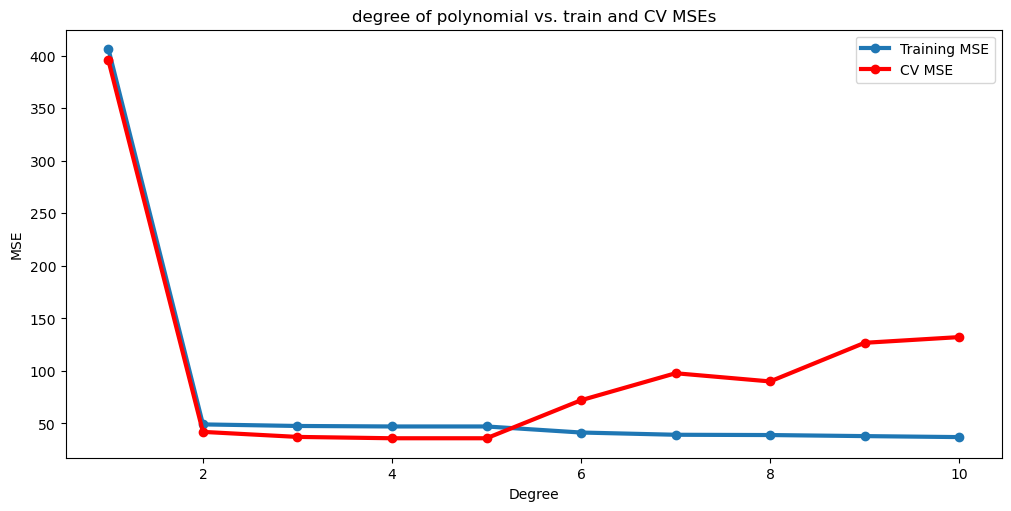

In [42]:
# Let's use a plot to determine which model performed better
fig, ax = plt.subplots(layout="constrained", figsize=(10,5))
ax.plot(np.arange(1, 11), train_mses, label="Training MSE", linewidth=3, marker="o")
ax.plot(np.arange(1, 11), cv_mses, label="CV MSE", linewidth=3, c="red", marker="o")
ax.set(title="degree of polynomial vs. train and CV MSEs", xlabel="Degree", ylabel="MSE")
ax.legend();

In [43]:
# Find the best model 
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=5


In [44]:
x_test_mapped = results[degree-1]["poly"].transform(x_test)
x_test_mapped_scaled = results[degree-1]["scaler"].transform(x_test_mapped)
yhat = results[degree-1]["model"].predict(x_test_mapped_scaled)

print("Test MSE={}".format(mean_squared_error(y_test, yhat)/2))

Test MSE=112.04944807180595


In [45]:
# Let's try this same process using neural networks:

import tensorflow as tf
tf.random.set_seed(20)

In [61]:
models = [
    tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(25, activation = 'relu'),
            tf.keras.layers.Dense(15, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'linear')
        ],
        name='model_1'
    ),
     tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(20, activation = 'relu'),
            tf.keras.layers.Dense(12, activation = 'relu'),
            tf.keras.layers.Dense(12, activation = 'relu'),
            tf.keras.layers.Dense(10, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'linear')
        ],
        name='model_2'
    ),
     tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(32, activation = 'relu'),
            tf.keras.layers.Dense(16, activation = 'relu'),
            tf.keras.layers.Dense(8, activation = 'relu'),
            tf.keras.layers.Dense(4, activation = 'relu'),
            tf.keras.layers.Dense(12, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
]

In [62]:
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
scaler = StandardScaler()

X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

train_mses, cv_mses = [],[]
for model in models:
    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    model.fit(X_train_mapped_scaled, y_train, epochs=300, verbose=0)
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Record the cross validation MSEs 
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [63]:
for i, model in enumerate(models):
    print(f"Model {model.name}: Training MSE: {train_mses[i]:.2f}, CV MSE: {cv_mses[i]:.2f}")

Model model_1: Training MSE: 73.64, CV MSE: 46.68
Model model_2: Training MSE: 73.69, CV MSE: 48.21
Model model_3: Training MSE: 406.19, CV MSE: 395.46


In [ ]:
# Select the best model
model = models[0]
yhat = model.predict(scaler.transform(poly.tra